# Fraud  Loan Prediction:

Whether to give loan to a person or not based on the dataset information.

So here we will use classification technique to predict whether to give loan to a person or not.


# 1-Data Exploration (Reading the data and attributes name)

In [1]:
#Importing all basic required libray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#lets import the loan prediction data and print them
loan_init=pd.read_csv('loanprediction.csv')
print(loan_init.shape)

print(loan_init.head(10))

(614, 13)
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             300

In [3]:
#checking the information of the data and is there any null values present
loan_init.info()

#so here we saw for most of the attribute there are missing value, so lets deal those values first.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# 2-Exploratory Data Analysis (Exploring, Cleaning, Imputing & Visualizing)

In [4]:
#lets see what are the columns and print those
print(loan_init.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [5]:
#lets see what are the types of data are present in each attribute
columns= ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
for columns in loan_init:
    print("Column Name:",columns)
    #print(np.unique(loan_init[cols], return_counts=True))
    print(loan_init[columns].value_counts())
    print("\n")

Column Name: Loan_ID
LP001038    1
LP002308    1
LP001432    1
LP002536    1
LP002002    1
           ..
LP001482    1
LP001903    1
LP001749    1
LP001050    1
LP001404    1
Name: Loan_ID, Length: 614, dtype: int64


Column Name: Gender
Male      489
Female    112
Name: Gender, dtype: int64


Column Name: Married
Yes    398
No     213
Name: Married, dtype: int64


Column Name: Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Column Name: Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


Column Name: Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64


Column Name: ApplicantIncome
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64


Column Name: CoapplicantIncome
0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0  

In [6]:
#lets find what are the types of records are there in Loan_Status attribute and their counts
print(np.unique(loan_init['Loan_Status'], return_counts=True))
print('\n')
print(loan_init['Loan_Status'].value_counts())

(array(['N', 'Y'], dtype=object), array([192, 422], dtype=int64))


Y    422
N    192
Name: Loan_Status, dtype: int64


In [7]:
#so here Loan_Status attribute has 2 values, so for model building we will convert it to 1(Y) and 0(N).
#so lets map those values
loan_init['Loan_Status'] = loan_init['Loan_Status'].map({'N':0, 'Y':1})

#again lets find what are the types of records are there in Loan_Status attribute after mapping has been done
print(np.unique(loan_init['Loan_Status'], return_counts=True))
#counting the Loan_Status varibales
print(loan_init['Loan_Status'].value_counts())

(array([0, 1], dtype=int64), array([192, 422], dtype=int64))
1    422
0    192
Name: Loan_Status, dtype: int64


In [8]:
#lets check again what the attributes with missing values, so we can treat them
loan_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [9]:
#lets check for Gender attribute
print(loan_init['Gender'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64


In [10]:
#so here as most of the Gender are Male, so we can Replace Male for missing values
data=[loan_init]
for dataset in data:
    loan_init['Gender']=loan_init['Gender'].fillna(loan_init['Gender'].mode()[0])

#again check for Gender attribute after missing value replacement
print(loan_init['Gender'].value_counts())

Male      502
Female    112
Name: Gender, dtype: int64


In [11]:
#lets check for Married attribute
print(loan_init['Married'].value_counts())

Yes    398
No     213
Name: Married, dtype: int64


In [12]:
#so here as most of the Married are Yes, so we can Replace Yes for missing values
data=[loan_init]
for dataset in data:
    loan_init['Married']=loan_init['Married'].fillna(loan_init['Married'].mode()[0])

#again check for Married attribute after missing value replacement
print(loan_init['Married'].value_counts())

Yes    401
No     213
Name: Married, dtype: int64


In [13]:
#lets check for Dependents attribute
print(loan_init['Dependents'].value_counts())

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [14]:
#so here as most of the Dependents are '0', so we can Replace '0' for missing values
data=[loan_init]
for dataset in data:
    loan_init['Dependents']=loan_init['Dependents'].fillna(loan_init['Dependents'].mode()[0])

#again check for Dependents attribute after missing value replacement
print(loan_init['Dependents'].value_counts())

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [15]:
#lets check for Self_Employed attribute
print(loan_init['Self_Employed'].value_counts())

No     500
Yes     82
Name: Self_Employed, dtype: int64


In [16]:
#so here as most of the Self_Employed are 'No', so we can Replace 'No' for missing values
data=[loan_init]
for dataset in data:
    loan_init['Self_Employed']=loan_init['Self_Employed'].fillna(loan_init['Self_Employed'].mode()[0])

#again check for Self_Employed attribute after missing value replacement
print(loan_init['Self_Employed'].value_counts())

No     532
Yes     82
Name: Self_Employed, dtype: int64


In [17]:
#lets check for LoanAmount attribute
print(loan_init['LoanAmount'].describe())

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


In [18]:
#lets fill LoanAmount missing value by the average
data=[loan_init]
for dataset in data:
    mean = loan_init['LoanAmount'].mean()
    std = loan_init['LoanAmount'].std()
    is_null = dataset['LoanAmount'].isnull().sum()
    # calculate random numbers between the mean, std and is_null
    rand_amount = np.random.randint(mean - std, mean + std, size = is_null)
    # filling these random values in Age column
    miss_amount = loan_init["LoanAmount"].copy()
    miss_amount[np.isnan(miss_amount)] = rand_amount
    loan_init["LoanAmount"] = miss_amount
    loan_init["LoanAmount"] = loan_init["LoanAmount"].astype(int)

#again check for LoanAmount attribute after missing value replacement
print(loan_init['LoanAmount'].describe())

count    614.000000
mean     146.602606
std       84.524976
min        9.000000
25%      100.000000
50%      128.000000
75%      170.000000
max      700.000000
Name: LoanAmount, dtype: float64


In [19]:
#lets check for Loan_Amount_Term attribute
print(loan_init['Loan_Amount_Term'].describe())

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64


In [20]:
#lets fill Loan_Amount_Term missing value by the average
data=[loan_init]
for dataset in data:
    mean = loan_init['Loan_Amount_Term'].mean()
    std = loan_init['Loan_Amount_Term'].std()
    is_null = dataset['Loan_Amount_Term'].isnull().sum()
    # calculate random numbers between the mean, std and is_null
    rand_amount_term = np.random.randint(mean - std, mean + std, size = is_null)
    # filling these random values in Age column
    miss_amount_term = loan_init["Loan_Amount_Term"].copy()
    miss_amount_term[np.isnan(miss_amount_term)] = rand_amount_term
    loan_init["Loan_Amount_Term"] = miss_amount_term
    loan_init["Loan_Amount_Term"] = loan_init["Loan_Amount_Term"].astype(int)

#again check for Loan_Amount_Term attribute after missing value replacement
print(loan_init['Loan_Amount_Term'].describe())

count    614.000000
mean     342.055375
std       64.586325
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64


In [21]:
#lets check for Credit_History attribute
print(loan_init['Credit_History'].describe())

count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64


In [22]:
#lets fill Credit_History missing value by the average
data=[loan_init]
for dataset in data:
    mean = loan_init['Credit_History'].mean()
    std = loan_init['Credit_History'].std()
    is_null = dataset['Credit_History'].isnull().sum()
    # calculate random numbers between the mean, std and is_null
    cred_hist = np.random.randint(mean - std, mean + std, size = is_null)
    # filling these random values in Age column
    miss_cred = loan_init["Credit_History"].copy()
    miss_cred[np.isnan(miss_cred)] = cred_hist
    loan_init["Credit_History"] = miss_cred
    loan_init["Credit_History"] = loan_init["Credit_History"].astype(int)

#again check for Credit_History attribute after missing value replacement
print(loan_init['Credit_History'].describe())

count    614.000000
mean       0.773616
std        0.418832
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64


In [23]:
#lets see again what are the missing values
loan_init.info()

#now we can see there so many attributes where thae data types are object, so lets encode those using onhot encoder

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int32  
 9   Loan_Amount_Term   614 non-null    int32  
 10  Credit_History     614 non-null    int32  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(1), int32(3), int64(2), object(7)
memory usage: 55.3+ KB


In [24]:
#so here Gender,Married,Dependents,Education,Self_Employed,Property_Area attributes needs to encode

from sklearn.preprocessing import OneHotEncoder

Gender=pd.get_dummies(loan_init['Gender'],prefix='Gender')
print(Gender.head())
print(Gender.shape)

Married=pd.get_dummies(loan_init['Married'],prefix='Married')
print(Married.head())
print(Married.shape)

Dependents=pd.get_dummies(loan_init['Dependents'],prefix='Dependents')
print(Dependents.head())
print(Dependents.shape)

Education=pd.get_dummies(loan_init['Education'],prefix='Education')
print(Education.head())
print(Education.shape)

Self_Employed=pd.get_dummies(loan_init['Self_Employed'],prefix='Self_Employed')
print(Self_Employed.head())
print(Self_Employed.shape)

Property_Area=pd.get_dummies(loan_init['Property_Area'],prefix='Property_Area')
print(Property_Area.head())
print(Property_Area.shape)


   Gender_Female  Gender_Male
0              0            1
1              0            1
2              0            1
3              0            1
4              0            1
(614, 2)
   Married_No  Married_Yes
0           1            0
1           0            1
2           0            1
3           0            1
4           1            0
(614, 2)
   Dependents_0  Dependents_1  Dependents_2  Dependents_3+
0             1             0             0              0
1             0             1             0              0
2             1             0             0              0
3             1             0             0              0
4             1             0             0              0
(614, 4)
   Education_Graduate  Education_Not Graduate
0                   1                       0
1                   1                       0
2                   1                       0
3                   0                       1
4                   1                       0
(

In [25]:
#lets combine all the attributes(Gender,Married,Dependents,Education,Self_Employed,Property_Area) which are encoded
combine_data=[loan_init,Gender,Married,Dependents,Education,Self_Employed,Property_Area]
loandata=pd.concat(combine_data,axis=1)
print(loan_init.shape)
print(loandata.shape)
print(loandata.head())

(614, 13)
(614, 28)
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  ...  \
0             5849                0.0         127               360  ...   
1             4583             1508.0         128               360  ...   
2             3000                0.0          66               360  ...   
3             2583             2358.0         120               360  ...   
4             6000                0.0         141               360  ...   

   Dependents_1 Dependents_2  Dependents_3+  Education_Graduate  \
0             0            0             

In [26]:
#now lets drop Gender,Married,Dependents,Education,Self_Employed,Property_Area attribute from the dataset, 
#as we have converted them to numerical value and also drop Loan_ID which is also not required for our analysis
loan_final=loandata.drop(columns=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
                                  'Self_Employed','Property_Area'])
print(loan_init.shape)
print(loandata.shape)
print(loan_final.shape)
print(loan_final.columns)
print(loan_final.head())

(614, 13)
(614, 28)
(614, 21)
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         127               360   
1             4583             1508.0         128               360   
2             3000                0.0          66               360   
3             2583             2358.0         120               360   
4             6000                0.0         141               360   

   Credit_History  Loan_Status  Gender_Female  Gender_Male  Married_No  \
0 

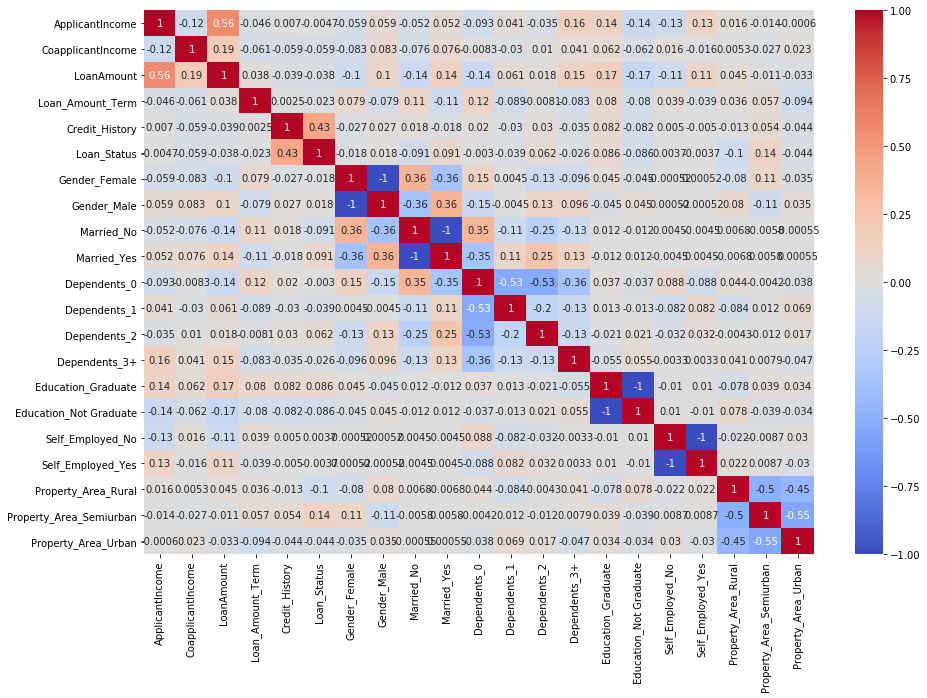

In [27]:
#lets see the corelation among data wrt Loan_Status
plt.figure(figsize=(15,10))
sns.heatmap(loan_final.corr(),cmap='coolwarm',annot=True)


Text(0.5, 1.0, 'Loan_Status Vs ApplicantIncome')

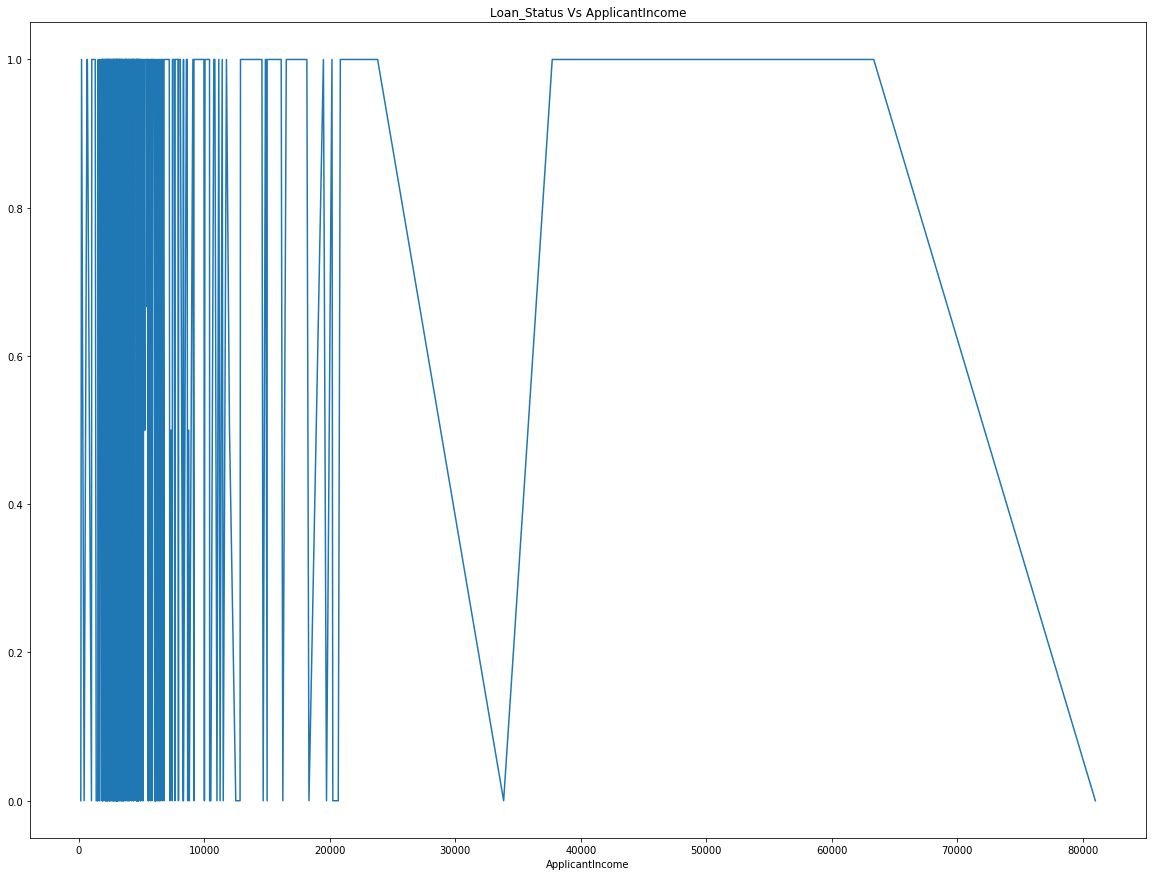

In [28]:
# now lets see the distribution of "Loan_Status" wrt "ApplicantIncome"
byAge=loan_final.groupby('ApplicantIncome').mean()
plt.figure(figsize=(20,15))
byAge['Loan_Status'].plot()
plt.title('Loan_Status Vs ApplicantIncome')

Text(0.5, 1.0, 'Loan_Status Vs CoapplicantIncome')

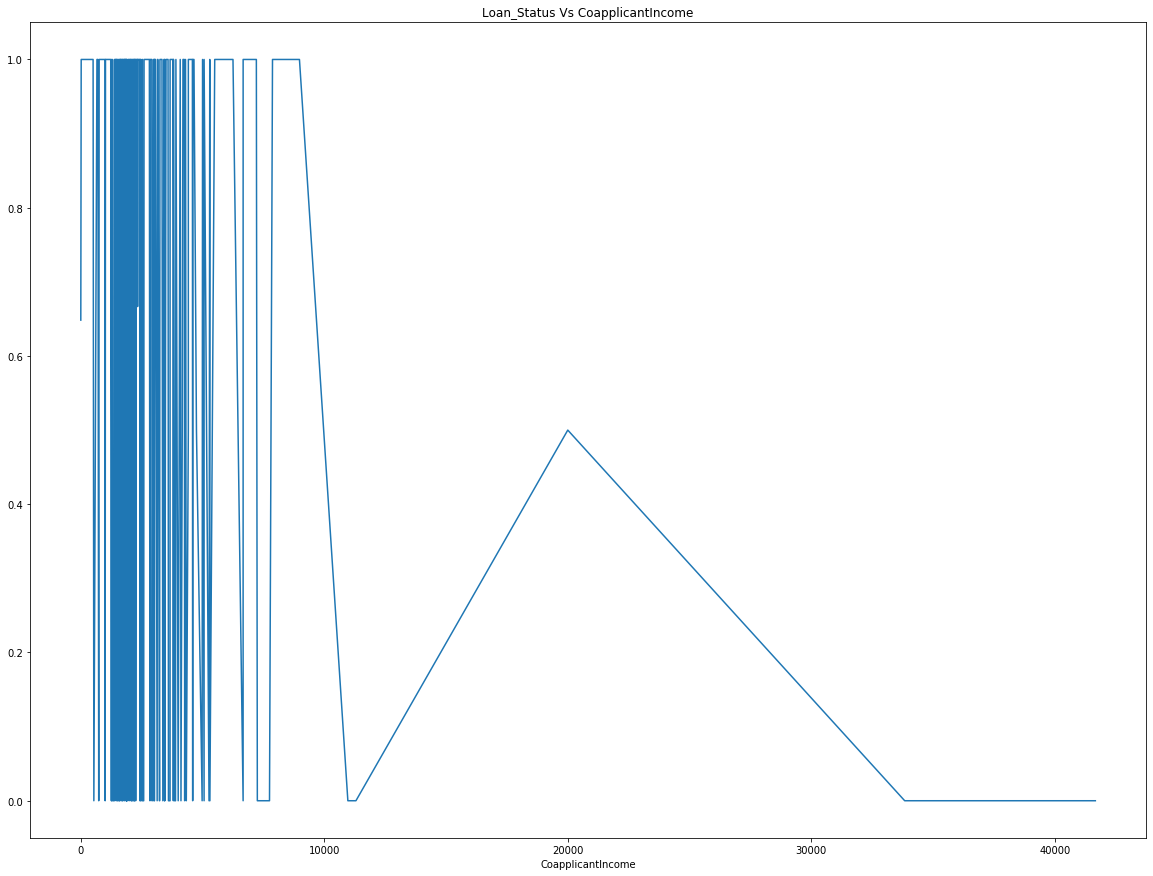

In [29]:
# now lets see the distribution of "Loan_Status" wrt "CoapplicantIncome"
byAge=loan_final.groupby('CoapplicantIncome').mean()
plt.figure(figsize=(20,15))
byAge['Loan_Status'].plot()
plt.title('Loan_Status Vs CoapplicantIncome')

ApplicantIncome             AxesSubplot(0.125,0.125;0.031x0.755)
CoapplicantIncome          AxesSubplot(0.1622,0.125;0.031x0.755)
LoanAmount                 AxesSubplot(0.1994,0.125;0.031x0.755)
Loan_Amount_Term           AxesSubplot(0.2366,0.125;0.031x0.755)
Credit_History             AxesSubplot(0.2738,0.125;0.031x0.755)
Loan_Status                 AxesSubplot(0.311,0.125;0.031x0.755)
Gender_Female              AxesSubplot(0.3482,0.125;0.031x0.755)
Gender_Male                AxesSubplot(0.3854,0.125;0.031x0.755)
Married_No                 AxesSubplot(0.4226,0.125;0.031x0.755)
Married_Yes                AxesSubplot(0.4598,0.125;0.031x0.755)
Dependents_0                AxesSubplot(0.497,0.125;0.031x0.755)
Dependents_1               AxesSubplot(0.5342,0.125;0.031x0.755)
Dependents_2               AxesSubplot(0.5714,0.125;0.031x0.755)
Dependents_3+              AxesSubplot(0.6086,0.125;0.031x0.755)
Education_Graduate         AxesSubplot(0.6458,0.125;0.031x0.755)
Education_Not Graduate   

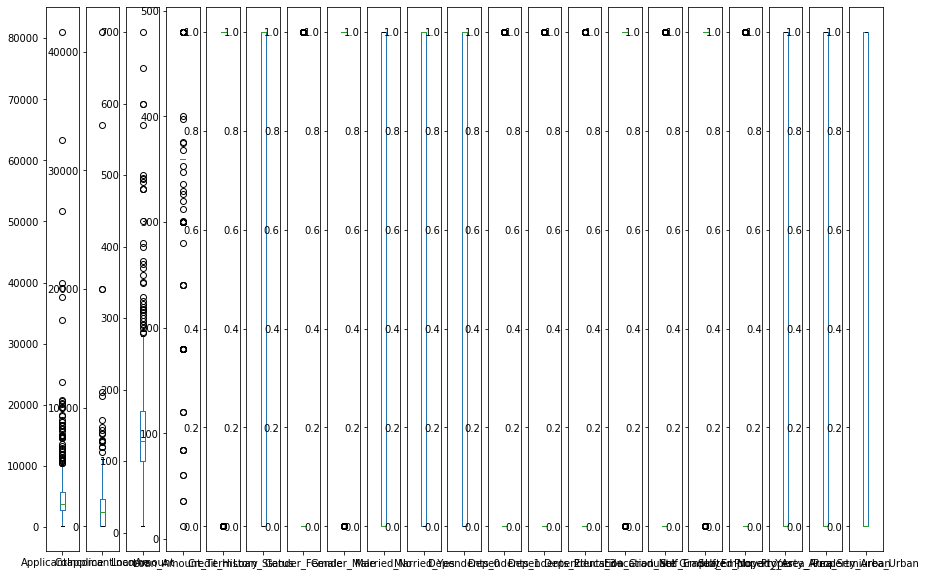

In [30]:
#checking the outliers with box plot
loan_final.plot(kind='box',subplots=True, figsize=(15,10))

In [31]:
#here we saw thare so many attributes for which there are outliers present, so lets threat them using z score
from scipy.stats import zscore

loan_data=loan_final
print(loan_final.shape)
z_score=abs(zscore(loan_data))
print('Z Score is:','\n',z_score)
loan_data=loan_data.loc[(z_score<3).all(axis=1)]
print(loan_data.shape)
print(loan_data.head(5))

(614, 21)
Z Score is: 
 [[0.07299082 0.55448733 0.23210404 ... 0.64147818 0.7820157  1.42814704]
 [0.13441195 0.03873155 0.22026357 ... 1.55889948 0.7820157  0.70020801]
 [0.39374734 0.55448733 0.95437263 ... 0.64147818 0.7820157  1.42814704]
 ...
 [0.43717437 0.47240418 1.25979501 ... 0.64147818 0.7820157  1.42814704]
 [0.35706382 0.55448733 0.47832408 ... 0.64147818 0.7820157  1.42814704]
 [0.13441195 0.55448733 0.16106123 ... 0.64147818 1.2787467  0.70020801]]
(533, 21)
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         127               360   
1             4583             1508.0         128               360   
2             3000                0.0          66               360   
3             2583             2358.0         120               360   
4             6000                0.0         141               360   

   Credit_History  Loan_Status  Gender_Female  Gender_Male  Married_No  \
0               1    

Text(0.5, 1.0, 'Loan_Status Vs ApplicantIncome')

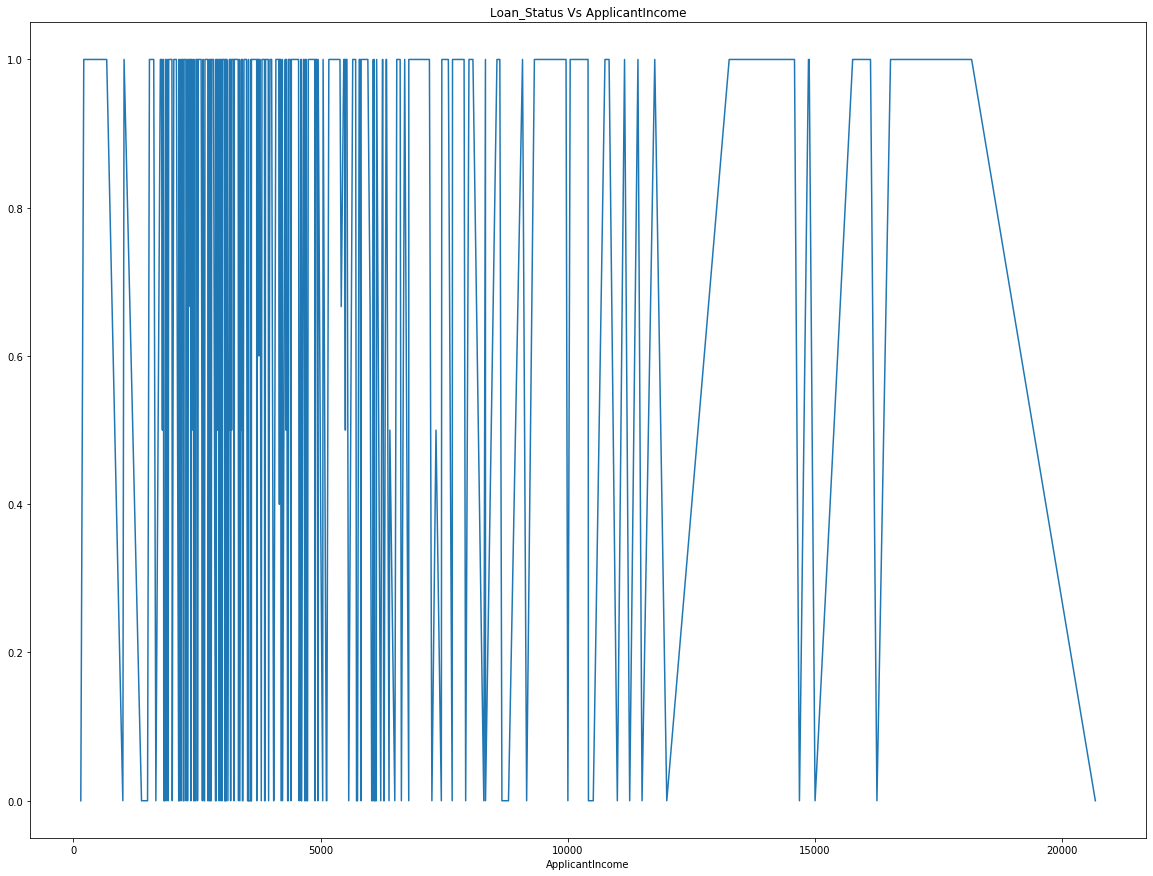

In [32]:
# now lets see the distribution of "Loan_Status" wrt "ApplicantIncome"
byAge=loan_data.groupby('ApplicantIncome').mean()
plt.figure(figsize=(20,15))
byAge['Loan_Status'].plot()
plt.title('Loan_Status Vs ApplicantIncome')

# 3-Building Different Model and Finding the Best Model

In [52]:
#lets separating the input and output/target variables
x=loan_data.drop(columns=['Loan_Status'])
y=loan_data[['Loan_Status']]

print(x.shape)
print(y.shape)

(533, 20)
(533, 1)


In [53]:
#scaling the input variables using min max scaler
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,5))
x=sc.fit_transform(dx)
x=pd.DataFrame(x,columns=dx.columns)

In [54]:
#dividing the train and test dataset
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(426, 20) (107, 20)
(426, 1) (107, 1)


In [38]:
#defining the models which will be used for model building
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.svm import SVC
sv=SVC()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gd=GradientBoostingClassifier()

In [39]:
#appending all the models
models=[]
models.append(('LogisticRegression',lr))
models.append(('SVC',sv))
models.append(('KNeighborsClassifier',knn))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gnb))
models.append(('MultinomialNB',mnb))
models.append(('RandomForestClassifier',rf))
models.append(('AdaBoostClassifier',ad))
models.append(('GradientBoostingClassifier',gd))

In [40]:
#lets import all the classification outputs
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

************************ LogisticRegression **********************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score: 0.794392523364486


Cross Value Score: 0.770964360587002


roc_auc_score: 0.7254299754299753


Classification Report:               precision    recall  f1-score   support

           0       0.72      0.55      0.62        33
           1       0.82      0.91      0.86        74

    accuracy                           0.79       107
   macro avg       0.77      0.73      0.74       107
weighted avg       0.79      0.79      0.79       107



Confusion Matrix:
 [[18 15]
 [ 7 67]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************************ SVC **********************




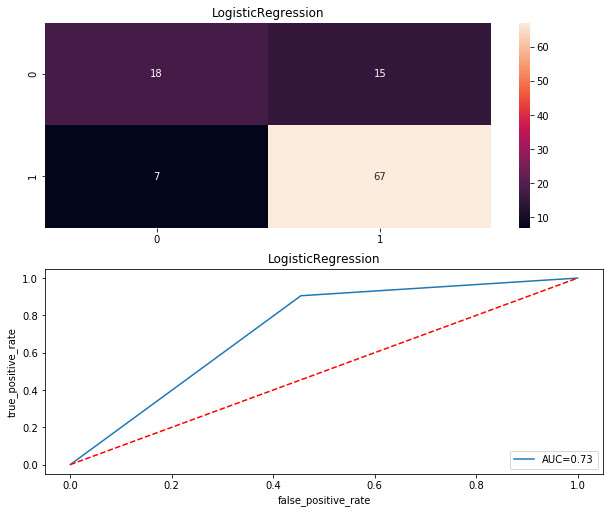

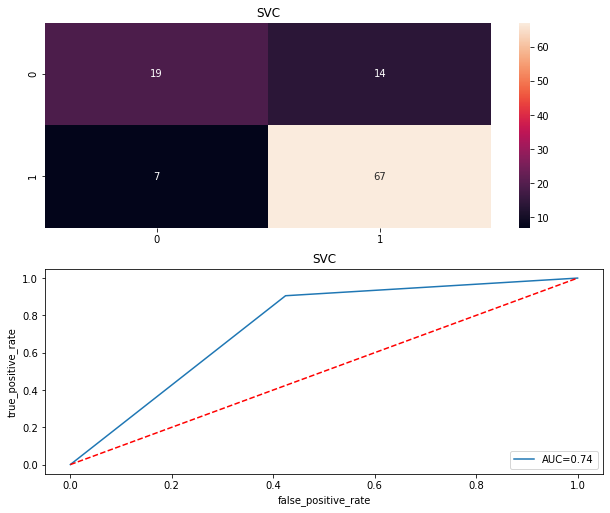

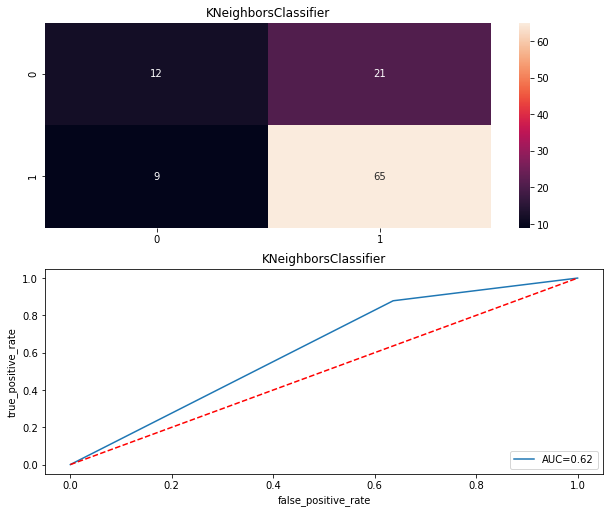

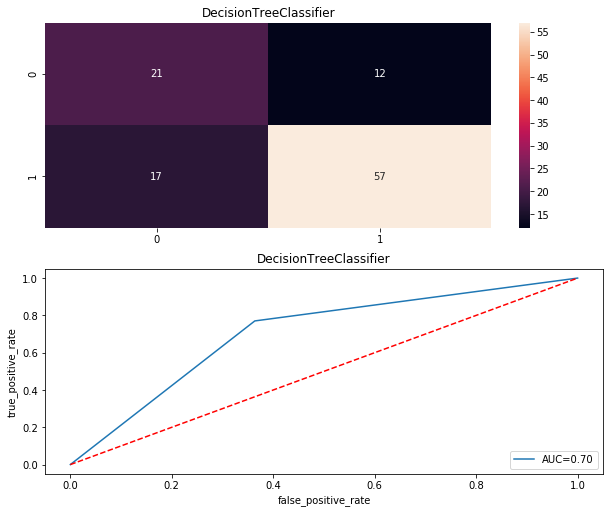

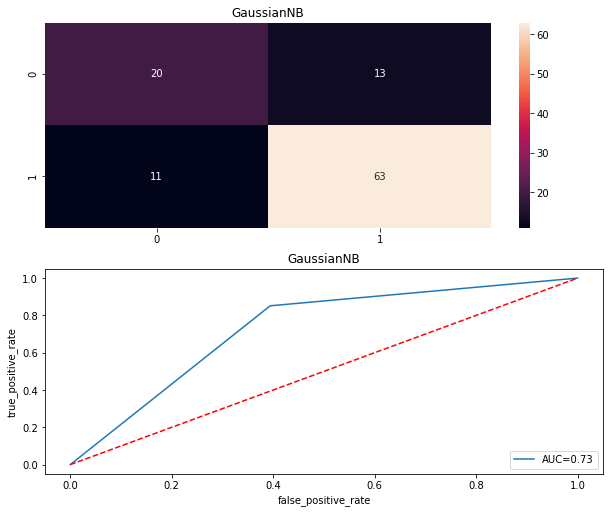

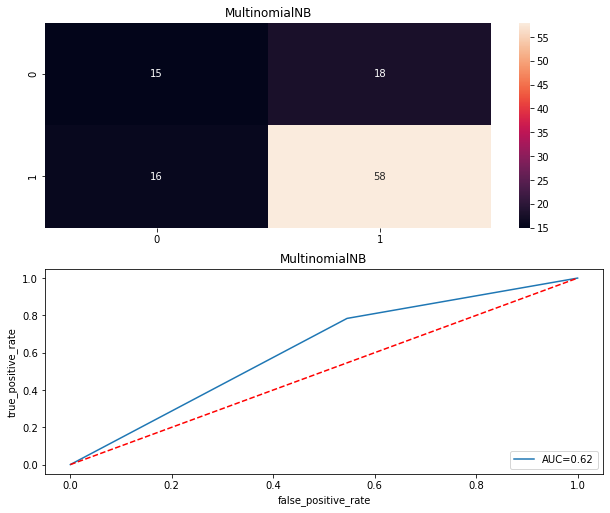

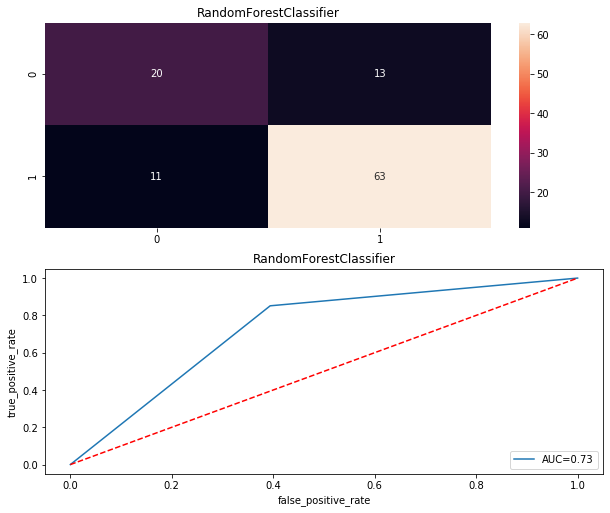

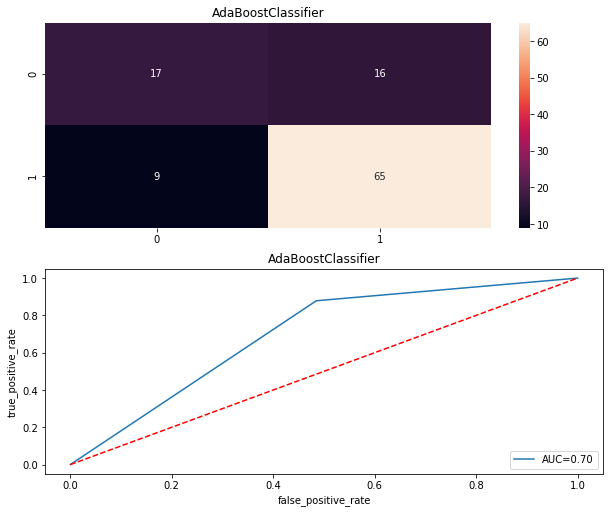

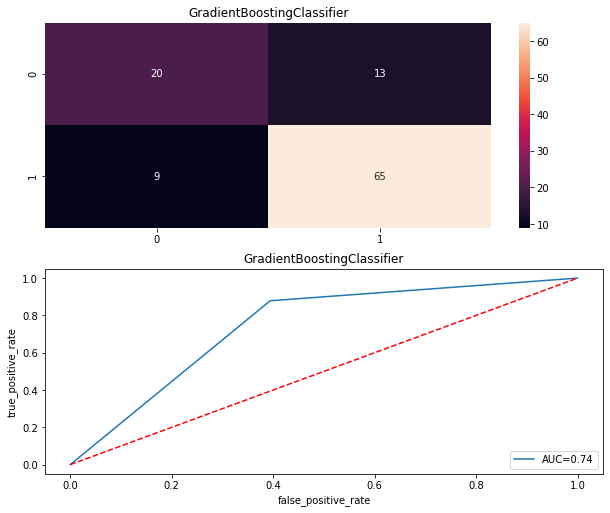

In [41]:
#printing the output of each model
Model=[]
score=[]
cvs=[]
rocscore=[]
for name, model in models:
    print('************************',name,'**********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy Score:',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model, x,y,cv=10,scoring='accuracy').mean()
    print('Cross Value Score:',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, threshold= roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score:',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    cr=classification_report(y_test,pred)
    print('Classification Report:',cr )
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('Confusion Matrix:\n',cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('true_positive_rate')
    plt.xlabel('false_positive_rate')
    print('\n\n')

In [42]:
#lets print the final result of all the models
result=pd.DataFrame({'Model':Model,'Accuracy_Score':score,'Cross_Value_Score':cvs,'Roc_Auc_Curve':rocscore})
print(result)

                        Model  Accuracy_Score  Cross_Value_Score  \
0          LogisticRegression       79.439252          77.096436   
1                         SVC       80.373832          77.851153   
2        KNeighborsClassifier       71.962617          70.342418   
3      DecisionTreeClassifier       72.897196          69.965059   
4                  GaussianNB       77.570093          73.137666   
5               MultinomialNB       68.224299          67.700908   
6      RandomForestClassifier       77.570093          74.095038   
7          AdaBoostClassifier       76.635514          72.976939   
8  GradientBoostingClassifier       79.439252          72.222222   

   Roc_Auc_Curve  
0      72.542998  
1      74.058149  
2      62.100737  
3      70.331695  
4      72.870598  
5      61.916462  
6      72.870598  
7      69.676495  
8      74.221949  


In [43]:
# So here LogisticRegression is the best model, so lets find out the best parameter for this to get maximum score
#lets use grid search method to find optimal value 

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lgreg=LogisticRegression()
parameters={'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25],'random_state':range(42,100)} #l1-lasso, l2-ridge
clf=GridSearchCV(lgreg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'C': 0.009, 'penalty': 'l2', 'random_state': 42}

Accuracy Score is: 0.7570093457943925
Cross Value Score: 0.7710342417889587
ROC_AUC Score: 0.6951492537313433
Confusion Matix:
 [[18 22]
 [ 4 63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.45      0.58        40
           1       0.74      0.94      0.83        67

    accuracy                           0.76       107
   macro avg       0.78      0.70      0.70       107
weighted avg       0.77      0.76      0.74       107

AxesSubplot(0.125,0.808774;0.62x0.0712264)


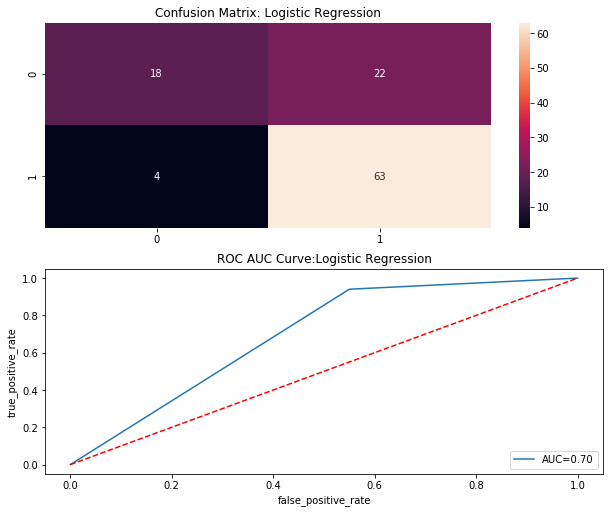

In [55]:
# So lets build the final model with 'C': 0.009, 'penalty': 'l2', 'random_state': 42

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
lgreg=LogisticRegression(C=0.009,penalty='l2',random_state=42)
lgreg.fit(x_train,y_train)
pred_lg=lgreg.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test,pred_lg))
print('Cross Value Score:', cross_val_score(lgreg, x,y,cv=10,scoring='accuracy').mean())
false_positive_rate, true_positive_rate, threshold= roc_curve(y_test,pred_lg)
print('ROC_AUC Score:',auc(false_positive_rate,true_positive_rate))
print('Confusion Matix:\n', confusion_matrix(y_test,pred_lg))
print('Classification Report:\n', classification_report(y_test,pred_lg))

#lets print the confusion matrix
cm=confusion_matrix(y_test,pred_lg)
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('Confusion Matrix: Logistic Regression')
print(sns.heatmap(
cm,annot=True))
plt.subplot(912)

#lets print the roc auc curve
roc_auc=auc(false_positive_rate,true_positive_rate)
plt.title('ROC AUC Curve:Logistic Regression')
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')  

In [45]:
#lets predict the Loan Prediction
print('Actual Attrition:\n',y_test)
print('Predicted Attrition:\n',pred_lg)

Actual Attrition:
      Loan_Status
519            0
464            0
426            0
92             1
452            0
..           ...
372            1
444            1
218            0
346            0
45             1

[107 rows x 1 columns]
Predicted Attrition:
 [1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1]


In [46]:
#saving the final model
from sklearn.externals import joblib
#save the model as joblib in a file
joblib.dump(lgreg,'lgreg_loan_prediction.obj')

['lgreg_loan_prediction.obj']

In [47]:
# load the model from the file
loan_prediction_from_joblib=joblib.load('lgreg_loan_prediction.obj')

In [48]:
#Use the loaded model to make predictions against test data
loan_prediction_from_joblib.predict(x_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
      dtype=int64)

# Conclusion:
    
So here 'LogisticRegression Model' is the best model out of all model tested above and by looking this we 
can conclude that our model is predicting around 83% of correct results for predicting whether to give loan or not.